In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import functions as main

import warnings
warnings.filterwarnings('ignore')

# Load Full Clean Df

In [3]:
opencsv = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\data_df_pre_covid_transformed.csv", sep=",")
opencsv.set_index('Date', inplace=True)
opencsv.index = pd.to_datetime(opencsv.index)
opencsv = opencsv.astype(float)

In [7]:
opencsv.head()

,JPY_EUR,BTC_PageViews,Crypto_PageViews,BTC_Supply,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,...,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,,,,,
2010-09-24,0.00888,NaN,NaN,4091750.0,1.165714e-07,9.694689e-12,-1.168041e-06,-0.008558,0.215828,0.110011,...,0.012406,0.007912,0.045043,-0.010620,0.077941,0.115819,0.063193,0.027031,0.000956,0.000717
2010-10-01,0.00878,NaN,NaN,4157600.0,-1.276735e-08,1.896105e-11,3.943009e-07,-0.009960,0.268974,0.079394,...,-0.004829,-0.036393,0.000000,-0.020253,0.080478,0.102950,0.051803,0.034592,0.000567,0.000364
2010-10-08,0.00871,NaN,NaN,4206900.0,1.381094e-06,0.000000e+00,2.284634e-06,0.020903,0.271499,0.103109,...,0.005497,0.026899,0.090749,0.010867,0.099692,0.173729,-0.013517,0.047940,-0.001509,-0.000793
2010-10-15,0.00872,NaN,NaN,4267300.0,1.007510e-06,2.807865e-12,-1.447250e-06,0.005284,0.127880,0.080880,...,0.012926,0.025317,-0.009935,0.003705,0.073228,0.164077,-0.136911,-0.051067,-0.000239,-0.000186
2010-10-22,0.00884,NaN,NaN,4349150.0,2.220408e-07,3.647072e-11,-5.673744e-07,0.005401,-0.137688,0.015310,...,0.001114,0.016614,-0.003976,0.008892,-0.143193,-0.159251,0.038473,0.029185,0.001870,0.001313


In [11]:
pre_covid_df = opencsv.copy()
pre_covid_df = pre_covid_df.drop(columns=["BTC_PageViews", "Crypto_PageViews"]) # removi porque nao tem a informacao completa para estes anos todos

In [12]:
pre_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 484 entries, 2010-09-24 to 2019-12-27
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   JPY_EUR             484 non-null    float64
 1   BTC_Supply          484 non-null    float64
 2   BTC_USD             484 non-null    float64
 3   Mining_Difficulty   484 non-null    float64
 4   USD_OnChain_Volume  484 non-null    float64
 5   M2_Liquidity        484 non-null    float64
 6   EUR_USD             484 non-null    float64
 7   JPY_USD             484 non-null    float64
 8   SPY                 484 non-null    float64
 9   QQQ                 484 non-null    float64
 10  EXSA                484 non-null    float64
 11  JPXN                484 non-null    float64
 12  IWDA                484 non-null    float64
 13  GLD                 484 non-null    float64
 14  SLV                 484 non-null    float64
 15  TLT                 484 non-null    fl

In [13]:
pre_covid_df

,JPY_EUR,BTC_Supply,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,,,
2010-09-24,0.008880,4091750.0,1.165714e-07,9.694689e-12,-1.168041e-06,-0.008558,0.215828,0.110011,0.014741,0.012406,0.007912,0.045043,-0.010620,0.077941,0.115819,0.063193,0.027031,0.000956,0.000717
2010-10-01,0.008780,4157600.0,-1.276735e-08,1.896105e-11,3.943009e-07,-0.009960,0.268974,0.079394,-0.001329,-0.004829,-0.036393,0.000000,-0.020253,0.080478,0.102950,0.051803,0.034592,0.000567,0.000364
2010-10-08,0.008710,4206900.0,1.381094e-06,0.000000e+00,2.284634e-06,0.020903,0.271499,0.103109,0.012210,0.005497,0.026899,0.090749,0.010867,0.099692,0.173729,-0.013517,0.047940,-0.001509,-0.000793
2010-10-15,0.008720,4267300.0,1.007510e-06,2.807865e-12,-1.447250e-06,0.005284,0.127880,0.080880,0.007339,0.012926,0.025317,-0.009935,0.003705,0.073228,0.164077,-0.136911,-0.051067,-0.000239,-0.000186
2010-10-22,0.008840,4349150.0,2.220408e-07,3.647072e-11,-5.673744e-07,0.005401,-0.137688,0.015310,0.004112,0.001114,0.016614,-0.003976,0.008892,-0.143193,-0.159251,0.038473,0.029185,0.001870,0.001313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-29,0.008290,18074525.0,2.648836e-02,0.000000e+00,-2.300513e-01,-0.011784,-0.048027,-0.046501,0.025396,0.026718,0.035369,-0.012352,0.031120,0.004350,0.003217,0.023235,0.012175,0.005127,-0.230402
2019-12-06,0.008277,18087337.5,-1.170155e-02,-4.559768e-03,5.886431e-02,0.022282,0.083155,0.038772,0.004245,-0.000817,-0.001494,0.105755,0.001976,-0.008701,-0.070778,-0.081865,-0.018982,0.027961,-0.034663
2019-12-13,0.008167,18100037.5,-1.647876e-02,0.000000e+00,-1.215670e-01,0.002385,0.071570,-0.033844,0.018574,0.017894,0.044834,0.008491,-0.002223,0.051840,0.057910,0.030885,0.029828,0.051212,0.049311


In [14]:
pre_covid_df.isna().sum()

JPY_EUR               0
BTC_Supply            0
BTC_USD               0
Mining_Difficulty     0
USD_OnChain_Volume    0
M2_Liquidity          0
EUR_USD               0
JPY_USD               0
SPY                   0
QQQ                   0
EXSA                  0
JPXN                  0
IWDA                  0
GLD                   0
SLV                   0
TLT                   0
BND                   0
Nr_Transactions       0
Nr_Addresses          0
dtype: int64

# Granger causality test 

In [15]:
from statsmodels.tsa.stattools import grangercausalitytests

# It is a statistical hypothesis test for determining whether one time series is useful in forecasting another

# lists to store variables
causality_true = []
causality_false = []

maxlag = 10
dependent_variable = "BTC_USD"

for column in pre_covid_df.columns:
    if column != dependent_variable:  # Skip the target variable
        # Perform Granger Causality Test
        # The data for testing whether the time series in the second column Granger causes the time series in the first column. 
        result = grangercausalitytests(pre_covid_df[[dependent_variable, column]], maxlag=maxlag, verbose=False)
        
        # Check if any lag has a p-value < 0.05
        min_p_value = min([result[lag][0]['ssr_chi2test'][1] for lag in range(1, maxlag+1)])

        if min_p_value < 0.05:
            causality_true.append(column)
        else:
            causality_false.append(column)

# Output the results
print(f"Variables that Granger-cause {dependent_variable}:", causality_true)
print(f"Variables that do NOT Granger-cause {dependent_variable}:", causality_false)

Variables that Granger-cause BTC_USD: ['Mining_Difficulty', 'USD_OnChain_Volume', 'SPY', 'QQQ', 'JPXN', 'Nr_Transactions', 'Nr_Addresses']
Variables that do NOT Granger-cause BTC_USD: ['JPY_EUR', 'BTC_Supply', 'M2_Liquidity', 'EUR_USD', 'JPY_USD', 'EXSA', 'IWDA', 'GLD', 'SLV', 'TLT', 'BND']


# PACF - BTC USD Price

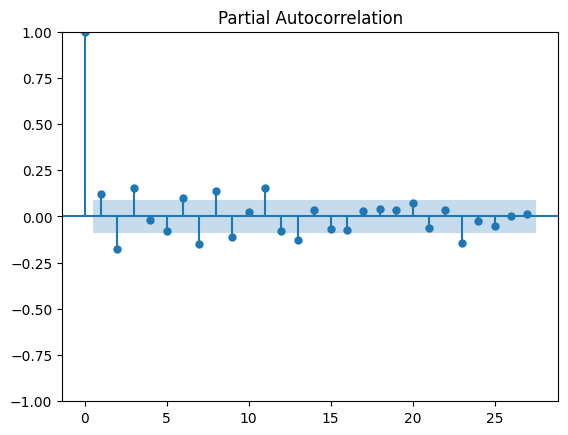

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(pre_covid_df.BTC_USD)
plt.show()

**So consider an AR(3)**

# Model Dfs

In [17]:
pre_covid_df.columns

Index(['JPY_EUR', 'BTC_Supply', 'BTC_USD', 'Mining_Difficulty',
       'USD_OnChain_Volume', 'M2_Liquidity', 'EUR_USD', 'JPY_USD', 'SPY',
       'QQQ', 'EXSA', 'JPXN', 'IWDA', 'GLD', 'SLV', 'TLT', 'BND',
       'Nr_Transactions', 'Nr_Addresses'],
      dtype='object')

In [77]:
'''
Distinguish between endogenous and exogenous variables based on their roles in the Bitcoin market:

Endogenous Variables: These are the primary variables of interest that the model aims to predict. 
They include the equilibrium closing price of Bitcoin (MKPRU), the number of unique MyWallet users (MWNUS), 
and the total Bitcoin available in the market (TOTBC)1.

Exogenous Variables: These are external factors that influence the endogenous variables. 
They include Miner’s Revenue (MIREV), Bitcoin Difficulty (DIFF), Number of Transactions per Block (NTRBL), 
Average Block Size (AVBLS), Change in the Number of Unique Addresses (NADDU), Total Output Volume (TRVOU), 
and Hash Rate (HRATE).

These distinctions help in understanding and forecasting Bitcoin’s market behavior.
'''

df_model = pre_covid_df.copy()

###         listas completas
###         endog = ['BTC_USD', 'Nr_Transactions', 'Nr_Addresses', 'BTC_Supply', 'Mining_Difficulty', 'USD_OnChain_Volume', 'BTC_PageViews', 'Crypto_PageViews']
###         exog = ['JPY_EUR',  'M2_Liquidity', 'EUR_USD', 'JPY_USD', 'SPY', 'QQQ', 'EXSA', 'JPXN', 'IWDA', 'GLD', 'SLV', 'TLT', 'BND']

endog = ['BTC_USD', 'Nr_Transactions', 'Nr_Addresses', 'BTC_Supply', 'Mining_Difficulty', 'USD_OnChain_Volume']
exog = ['JPY_EUR', 'EUR_USD', 'QQQ', 'IWDA', 'GLD', 'SLV', 'TLT']

split = int(0.9*(len(pre_covid_df)))

df_train = df_model[:split]
df_test = df_model[split:]

# Split the data into endogenous and exogenous variables for the training set
df_endog_train = df_train[endog]
df_exog_train = df_train[exog]

# Split the data into endogenous and exogenous variables for the testing set
df_endog_test = df_test[endog]
df_exog_test = df_test[exog]

In [ ]:
========================================================================================
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         0.008138         0.018492            0.440           0.660
JPY_EUR                       0.016774         0.031154            0.538           0.590
EUR_USD                       0.005595         0.013639            0.410           0.682
QQQ                          -0.071967         0.166753           -0.432           0.666
IWDA                          0.029072         0.087955            0.331           0.741
GLD                          -0.008351         0.019879           -0.420           0.674
SLV                           0.003492         0.010846            0.322           0.747
TLT                           0.026826         0.018104            1.482           0.138

In [19]:
# Output the results
print(f"Variables that Granger-cause {dependent_variable}:", causality_true)
print(f"Variables that do NOT Granger-cause {dependent_variable}:", causality_false)

Variables that Granger-cause BTC_USD: ['Mining_Difficulty', 'USD_OnChain_Volume', 'SPY', 'QQQ', 'JPXN', 'Nr_Transactions', 'Nr_Addresses']
Variables that do NOT Granger-cause BTC_USD: ['JPY_EUR', 'BTC_Supply', 'M2_Liquidity', 'EUR_USD', 'JPY_USD', 'EXSA', 'IWDA', 'GLD', 'SLV', 'TLT', 'BND']


In [20]:
df_endog_train.shape

(435, 6)

In [21]:
df_endog_test.shape

(49, 6)

# Determine max number lags

We can test the performance of our model by using the following methods:

**Akaike information criterion (AIC)**: It quantifies the quality of a model by balancing the fit of the model to the data with the complexity of the model. AIC provides a way to compare different models and choose the one that best fits the data with the least complexity.

**Bayesian information criterion (BIC)**: This stats measure is used for model selection among a set of candidate models. Like the Akaike information criterion (AIC), BIC provides a trade-off between the goodness of fit and model complexity. However, BIC places a stronger penalty on the number of parameters than AIC does, which can help prevent overfitting.

In [78]:
from statsmodels.tsa.api import VAR

# Lower is better

model = VAR(endog = df_endog_train, exog = df_exog_train)#
model.select_order(10).summary()

c:\Users\Rui Caseiro\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-2.146,-1.688,0.1170,-1.965
1,-15.45,-14.65,1.941e-07,-15.14
2,-16.92,-15.77*,4.504e-08,-16.46
3,-17.12,-15.63,3.671e-08,-16.53
4,-17.34,-15.51,2.944e-08,-16.62
5,-17.57,-15.39,2.357e-08,-16.71
6,-17.63,-15.12,2.207e-08,-16.64
7,-17.72,-14.86,2.018e-08,-16.59
8,-17.98,-14.78,1.563e-08,-16.72*
9,-17.97,-14.42,1.588e-08,-16.57


# Fit a VAR Model

In [79]:
from statsmodels.tsa.api import VAR

# Escolhi 4 lags porque é o que tem o AIC mais baixo e o BIC mais baixo é o lag 1, então também inclui esse

maxlags = 2

model_fit = model.fit(maxlags=maxlags)
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 23, Aug, 2024
Time:                     16:20:56
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -15.6923
Nobs:                     433.000    HQIC:                  -16.3751
Log likelihood:           75.2296    FPE:                4.95603e-08
AIC:                     -16.8205    Det(Omega_mle):     3.77983e-08
--------------------------------------------------------------------
Results for equation BTC_USD
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         0.007633         0.018267            0.418           0.676
JPY_EUR                       0.016368         0.031012            0.528           0.598
EUR_USD                   

prob = p-value

In [80]:
df_coeff=pd.DataFrame([model_fit.params["BTC_USD"], model_fit.pvalues["BTC_USD"]]).T
df_coeff.columns = ["coeff", "pval"]
df_coeff = df_coeff.query("pval < 0.05")
df_coeff

,coeff,pval
L1.BTC_USD,0.223112,0.000036
L1.Mining_Difficulty,-0.732958,0.011668
L1.USD_OnChain_Volume,-0.059746,0.002826
L2.BTC_USD,-0.229219,0.000053
L2.Nr_Transactions,0.042560,0.021723
L2.USD_OnChain_Volume,-0.068530,0.001006


# So our final model is:

Só considera prob / p-value < 0.05


BTC_USD = 0.35L1.SPY - 0.12L2.USD_OnChain_Volume + 0.14L2.SLV


### test different lags

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Step 1: Make predictions on the test set
# We start predicting after the last lag in the training set

# Initialize an empty DataFrame to store results for each lag
results_df = pd.DataFrame(columns=["Lag", "MAE", "RMSE", "MAPE"])

# Iterate over different lag values
for lag in range(1, 12):  # Start at 1 to avoid using a zero-lag, which doesn't make sense
    # Re-fit the model for the current lag
    model = VAR(endog = df_endog_train, exog = df_exog_train)
    model_fit = model.fit(maxlags=lag)
    
    # Make predictions on the test set
    n_forecast = len(df_test)
    forecast = model_fit.forecast(y=df_endog_train.values[-lag:], steps=n_forecast, exog_future=df_exog_test.values)

    # Convert the forecast to a DataFrame with the same column names as df_train
    forecast_df = pd.DataFrame(forecast, index=df_endog_test.index, columns=df_endog_test.columns)

    # Calculate MAE, RMSE, and MAPE for the specific column ('BTC_USD')
    mae = mean_absolute_error(df_test.BTC_USD, forecast_df.BTC_USD)
    rmse = np.sqrt(mean_squared_error(df_test.BTC_USD, forecast_df.BTC_USD))
    mape = mean_absolute_percentage_error(df_test.BTC_USD, forecast_df.BTC_USD)

    # Save the results into the DataFrame using pd.concat
    result_row = pd.DataFrame({"Lag": [lag], "MAE": [mae], "RMSE": [rmse], "MAPE": [mape]})
    results_df = pd.concat([results_df, result_row], ignore_index=True)
    
# Set the 'Lag' column as the index
results_df.set_index("Lag", inplace=True)

# Display the results DataFrame
print(results_df)

          MAE      RMSE      MAPE
Lag                              
1    0.199310  0.256318  1.533880
2    0.192893  0.252851  1.394389
3    0.188236  0.243385  1.234596
4    0.182138  0.235894  0.983458
5    0.186747  0.240176  1.087025
6    0.195541  0.248535  1.498355
7    0.182716  0.244326  1.380519
8    0.189090  0.254404  1.386306
9    0.207010  0.274642  1.762635
10   0.228899  0.295568  2.679169
11   0.260235  0.336088  2.504930


c:\Users\Rui Caseiro\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\Rui Caseiro\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\Rui Caseiro\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\Rui Caseiro\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\Rui Caseiro

# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [81]:
# https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(model_fit.resid)

for col, val in zip(df_endog_train.columns, out):
    print(col, ':', round(val, 2))

#   The value of this statistic can vary between 0 and 4. The closer it is to the value 2, 
#   then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, 
#   and the closer it is to 4 implies negative serial correlation.

BTC_USD : 1.82
Nr_Transactions : 2.04
Nr_Addresses : 2.02
BTC_Supply : 1.99
Mining_Difficulty : 2.13
USD_OnChain_Volume : 1.93


# Forecast

In [82]:
# Make predictions on the test set

n_forecast = len(df_endog_test)
forecast = model_fit.forecast(y=df_endog_train.values[-maxlags:], steps=n_forecast, exog_future=df_exog_test.values)

# Convert the forecast to a DataFrame with the same column names as df_train
forecast_df = pd.DataFrame(forecast, index=df_endog_test.index, columns=df_endog_test.columns)
yhat = forecast_df.BTC_USD

# Validate model - MAE, RMSE and MAPE

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

'''
# Calculate MAE, RMSE, and MAPE for the specific column ('BTC_USD')
mae = mean_absolute_error(df_endog_test.BTC_USD, forecast_df.BTC_USD)
rmse = np.sqrt(mean_squared_error(df_endog_test.BTC_USD, forecast_df.BTC_USD))
mape = mean_absolute_percentage_error(df_endog_test.BTC_USD, forecast_df.BTC_USD)

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
'''

In [30]:
def forecast_accuracy(forecast, actual):
    forecast = forecast.values
    actual = actual.values
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))    # MAPE Mean Absolute Percentage Error
    me = np.mean(forecast - actual)                             # ME Mean Error
    mae = np.mean(np.abs(forecast - actual))    # MAE Mean Absolute Error 
    mpe = np.mean((forecast - actual)/actual)   # MPE Mean Percentage Error
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE Root Mean Squared Error
    corr = np.corrcoef(forecast, actual)[0,1]   # corr Correlation
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

**MAPE (Mean absolute percentage error)** It considers actual values fed into model and fitted values from the model and calculates absolute difference between the two as a percentage of actual value and finally calculates mean of that.

In [83]:
forecast_accuracy(yhat, df_endog_test.BTC_USD)

{'mape': 1.2160985815670697,
 'me': -0.003262253119425895,
 'mae': 0.03151828828463954,
 'mpe': -1.1820933471595054,
 'rmse': 0.043457818752199395,
 'corr': -0.17855326886332906,
 'minmax': 11.12301564884078}

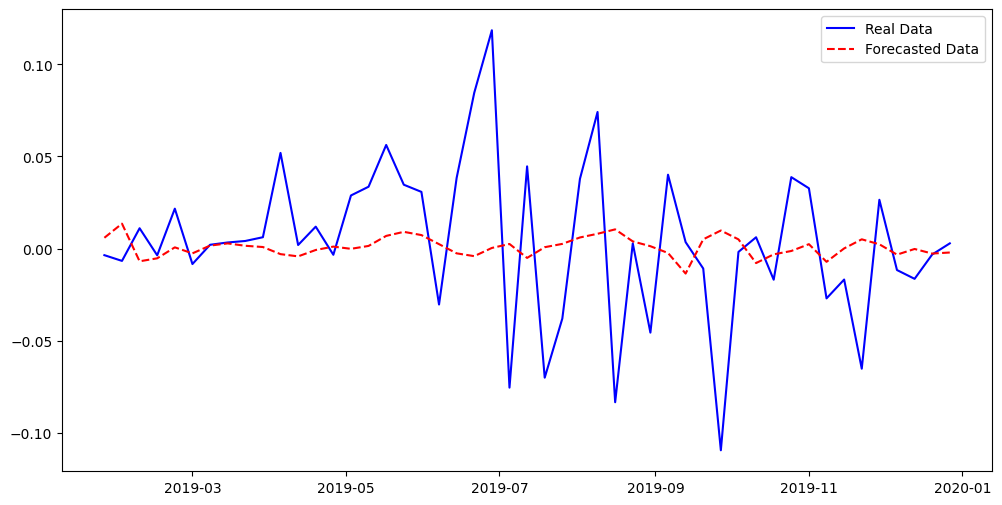

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(df_endog_test.BTC_USD, color='blue', label='Real Data')
plt.plot(yhat, color='red', linestyle='dashed', label='Forecasted Data')
plt.legend()

## Undo Data Transformations

In [46]:
opencsv_real_btc_price = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\df_weekly.csv", sep=",")
opencsv_real_btc_price = opencsv_real_btc_price[["Date", "BTC_USD"]]
opencsv_real_btc_price.set_index('Date', inplace=True)
opencsv_real_btc_price.index = pd.to_datetime(opencsv_real_btc_price.index)
opencsv_real_btc_price = opencsv_real_btc_price.astype(float)

In [65]:
# Assuming these are available from your original data processing steps

start_forecast = df_endog_test.index[0]
finnish_forecast = df_endog_test.index[-1]

ts = opencsv_real_btc_price.BTC_USD
ts = ts.loc[start_forecast:finnish_forecast]

mu = ts.mean()
sigma = ts.std()

normalized_ts = (ts - mu) / sigma

differenced_ts = normalized_ts.diff()

def revert_transformations(transformed_ts, original_ts):
    # Get the mean and standard deviation of the original series
    mu = original_ts.mean()
    sigma = original_ts.std()
    
    # Step 1: Undo the differencing
    undifferenced = transformed_ts.cumsum()
    
    # Add back the first value of the normalized series
    normalized_start = (original_ts.iloc[0] - mu) / sigma
    undifferenced = normalized_start + undifferenced
    
    # Step 2: Undo the normalization
    reverted = (undifferenced * sigma) + mu
    
    # Ensure the index matches the original series
    return reverted.reindex(original_ts.index)

#### Exemplo

In [25]:
# Usage example:
reverted_ts = revert_transformations(differenced_ts, ts)

compare_df = pd.DataFrame()

compare_df["x_axis"] = ts
compare_df["y_axis"] = reverted_ts
compare_df = compare_df.dropna()

main.dispersion_map(compare_df,compare_df["x_axis"], compare_df["y_axis"])

# a destransformaçao funciona impecavel

#### real

In [85]:
# Un Transform forecast data

reverted_yhat = revert_transformations(yhat, ts)
reverted_yhat.head()

Date
2019-01-25    3598.046182
2019-02-01    3633.150508
2019-02-08    3615.105977
2019-02-15    3601.275070
2019-02-22    3602.903938
Name: BTC_USD, dtype: float64

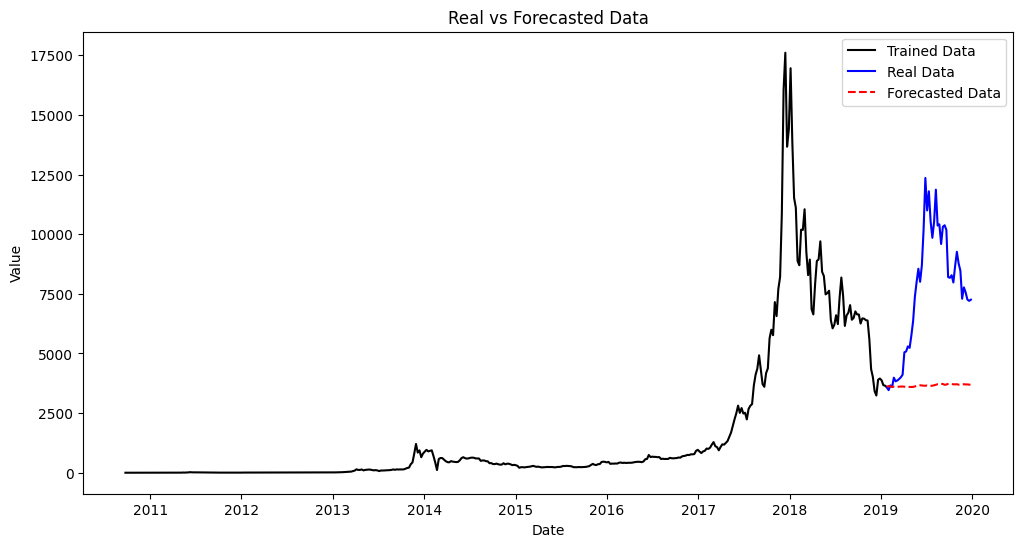

In [86]:
# Plot the real data
plt.figure(figsize=(12, 6))

# Plot trained data
trained_data = opencsv_real_btc_price.loc[df_endog_train.index[0]:start_forecast]
plt.plot(trained_data.index, trained_data, color='black', label='Trained Data')

# Plot the real data
plt.plot(ts.index, ts, color='blue', label='Real Data')

# Plot the forecasted data
plt.plot(reverted_yhat.index, reverted_yhat, color='red', linestyle='dashed', label='Forecasted Data')

# Add title and labels
plt.title('Real vs Forecasted Data')
plt.xlabel('Date')
plt.ylabel('Value')

# Add a legend
plt.legend()

# Show the plot
plt.show()